In [1]:
import pandas as pd
import nltk
import json
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from numpy import count_nonzero
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir(r"/content/drive/My Drive/hackathon_dataset")
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['test.json', 'train.json', 'val.json']

In [ ]:
dataframeTest = pd.read_json('test.json')
#print (dataframeTest.to_string())

dataframeTrain = pd.read_json('train.json')
#print (dataframeTrain.to_string())

dataframeVal = pd.read_json('val.json')
#print (dataframeVal.to_string())



In [ ]:
def wordcount(df):
  df['totalwords'] = df['summary'].str.split().str.len()
  # Get names of indexes for which column Age has value 30
  indexNames = df[ df['totalwords'] <=25].index
  # Delete these row indexes from dataFrame
  df.drop(indexNames , inplace=True)
  json = df.to_json(r"/content/drive/My Drive/hackathon_dataset/newtest.json")



In [ ]:

temptest = pd.read_json('newtest.json')

temptest.head()



,id,summary,dialogue,totalwords
2,13680171,Lenny can't decide which trousers to buy. Bob ...,"Lenny: Babe, can you help me with something?\r...",27
4,13828600,Jane is in Warsaw. Ollie and Jane has a party....,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...",42
5,13716964,Hilary has the keys to the apartment. Benjamin...,"Benjamin: Hey guys, what are we doing with the...",56
6,13731487,Payton provides Max with websites selling clot...,Max: Know any good sites to buy clothes from?\...,30
8,13680876,"Beatrice wants to buy Leo a scarf, but he does...","Beatrice: I am in town, shopping. They have ni...",27


In [ ]:
dataframeNew = pd.read_json('newtest.json')
#print (dataframeTest.to_string())


In [ ]:
temptest.columns

Index(['id', 'summary', 'dialogue', 'totalwords'], dtype='object')

In [ ]:
temptest.shape


(215, 4)

In [ ]:
testNew = temptest['summary'].to_dict()
print(testNew)

{2: "Lenny can't decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob's advice to pick the trousers that are of best quality.", 4: "Jane is in Warsaw. Ollie and Jane has a party. Jane lost her calendar. They will get a lunch this week on Friday. Ollie accidentally called Jane and talked about whisky. Jane cancels lunch. They'll meet for a tea at 6 pm.", 5: "Hilary has the keys to the apartment. Benjamin wants to get them and go take a nap. Hilary is having lunch with some French people at La Cantina. Hilary is meeting them at the entrance to the conference hall at 2 pm. Benjamin and Elliot might join them. They're meeting for the drinks in the evening.", 6: 'Payton provides Max with websites selling clothes. Payton likes browsing and trying on the clothes but not necessarily buying them. Payton usually buys clothes and books as he loves reading.', 8: "Beatrice wants to buy Leo a scarf, but he doesn't like scarves. She cares about his health and will buy hi

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Warren's wonderful code 

import pandas as pd
import nltk
import json
import os
nltk.download('punkt') #Not sure what this is but the error code recommended 'punkt' to be downloaded 
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer


nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #making sure were in the english language here 

from string import punctuation 
punctuation = list(punctuation)

print("Willy Wonka walked to the store, there he found beautiful pieces of bubblegum and ate it.")
tokens = word_tokenize("Willy Wonka walked to the store, there he found beautiful pieces of bubblegum and ate it.")
print(len(tokens)) #printing number of items in pre cleaned token 

cleaned_tokens = [token for token in tokens if token not in stopwords 

                  and token not in punctuation] #filtering out stopwords and punctuation 
print(len(cleaned_tokens))#printing number of items in cleaned_tokens 
print(cleaned_tokens)

lmtzr = WordNetLemmatizer()
lemmatized = [lmtzr.lemmatize(word) for word in cleaned_tokens]
 
print(lemmatized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Willy Wonka walked to the store, there he found beautiful pieces of bubblegum and ate it.
18
9
['Willy', 'Wonka', 'walked', 'store', 'found', 'beautiful', 'pieces', 'bubblegum', 'ate']
['Willy', 'Wonka', 'walked', 'store', 'found', 'beautiful', 'piece', 'bubblegum', 'ate']


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

sentence = {'1': 'i like cars', '2': 'cats are the best'}

lmtzr = WordNetLemmatizer()
lemmatized = [[lmtzr.lemmatize(word) for word in word_tokenize(s)] for s in sentence.values()]
print(lemmatized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[['i', 'like', 'car'], ['cat', 'are', 'the', 'best']]


In [ ]:


def clean_convo(convos):
  cleaned_tokens=[]
  for convo in convos:
    tokens = word_tokenize(convo) 
    cleaned_tokens.append([token for token in tokens if token not in stopwords and token not in punctuation])
  return cleaned_tokens

tokenized_cleaned_newtest_dialogue = clean_convo(temptest['dialogue'])


In [ ]:
newtest_summary = temptest['summary']

In [ ]:
tokenized_cleaned_newtest_dialogue[4]

['Beatrice',
 'I',
 'town',
 'shopping',
 'They',
 'nice',
 'scarfs',
 'shop',
 'next',
 'church',
 'Do',
 'want',
 'one',
 'Leo',
 'No',
 'thanks',
 'Beatrice',
 'But',
 "n't",
 'scarf',
 'Leo',
 'Because',
 'I',
 "n't",
 'need',
 'Beatrice',
 'Last',
 'winter',
 'cold',
 'time',
 'A',
 'scarf',
 'could',
 'help',
 'Leo',
 'I',
 "n't",
 'like',
 'Beatrice',
 'Actually',
 'I',
 "n't",
 'care',
 'You',
 'get',
 'scarf',
 'Leo',
 'How',
 'understanding',
 'Beatrice',
 'You',
 'complaining',
 'whole',
 'winter',
 "'re",
 'going',
 'die',
 'I',
 "'ve",
 'enough',
 'Leo',
 'Eh']

In [ ]:
temptest['dialogue'][4]

'Ollie: Hi , are you in Warsaw\r\nJane: yes, just back! Btw are you free for diner the 19th?\r\nOllie: nope!\r\nJane: and the  18th?\r\nOllie: nope, we have this party and you must be there, remember?\r\nJane: oh right! i lost my calendar..  thanks for reminding me\r\nOllie: we have lunch this week?\r\nJane: with pleasure!\r\nOllie: friday?\r\nJane: ok\r\nJane: what do you mean " we don\'t have any more whisky!" lol..\r\nOllie: what!!!\r\nJane: you just call me and the all thing i heard was that sentence about whisky... what\'s wrong with you?\r\nOllie: oh oh... very strange! i have to be carefull may be there is some spy in my mobile! lol\r\nJane: dont\' worry, we\'ll check on friday.\r\nOllie: don\'t forget to bring some sun with you\r\nJane: I can\'t wait to be in Morocco..\r\nOllie: enjoy and see you friday\r\nJane: sorry Ollie, i\'m very busy, i won\'t have time for lunch  tomorrow, but may be at 6pm after my courses?this trip to Morocco was so nice, but time consuming!\r\nOllie: 

In [ ]:
def word_frequency_score(dialogue):
  word_frequencies={}
  for word in dialogue:
    if word not in word_frequencies.keys():
      word_frequencies[word] = 1
    else:
      word_frequencies[word] += 1

  maximum_frequency = max(word_frequencies.values())

  for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequency)
    
  return word_frequencies


In [ ]:
word_frequencies = word_frequency_score(tokenized_cleaned_newtest_dialogue[4])

In [ ]:
print(word_frequencies)

{'Beatrice': 1.0, 'I': 1.0, 'town': 0.2, 'shopping': 0.2, 'They': 0.2, 'nice': 0.2, 'scarfs': 0.2, 'shop': 0.2, 'next': 0.2, 'church': 0.2, 'Do': 0.2, 'want': 0.2, 'one': 0.2, 'Leo': 1.0, 'No': 0.2, 'thanks': 0.2, 'But': 0.2, "n't": 0.8, 'scarf': 0.6, 'Because': 0.2, 'need': 0.2, 'Last': 0.2, 'winter': 0.4, 'cold': 0.2, 'time': 0.2, 'A': 0.2, 'could': 0.2, 'help': 0.2, 'like': 0.2, 'Actually': 0.2, 'care': 0.2, 'You': 0.4, 'get': 0.2, 'How': 0.2, 'understanding': 0.2, 'complaining': 0.2, 'whole': 0.2, "'re": 0.2, 'going': 0.2, 'die': 0.2, "'ve": 0.2, 'enough': 0.2, 'Eh': 0.2}


In [ ]:
word_frequencies.keys()

dict_keys(['Beatrice', 'I', 'town', 'shopping', 'They', 'nice', 'scarfs', 'shop', 'next', 'church', 'Do', 'want', 'one', 'Leo', 'No', 'thanks', 'But', "n't", 'scarf', 'Because', 'need', 'Last', 'winter', 'cold', 'time', 'A', 'could', 'help', 'like', 'Actually', 'care', 'You', 'get', 'How', 'understanding', 'complaining', 'whole', "'re", 'going', 'die', "'ve", 'enough', 'Eh'])

In [ ]:

def calculate_sentence_scores(sentence,word_frequencies):
  sentence_scores = {}
#for sent in sentence_list:
  for sent in sentence:
      for word in word_frequencies.keys():
        if sent not in sentence_scores.keys():
            sentence_scores[sent] = word_frequencies[word]
        else:
            sentence_scores[sent] += word_frequencies[word]
  return sentence_scores

In [ ]:
sentence_scores = calculate_sentence_scores(tokenized_cleaned_newtest_dialogue[4],word_frequencies)

In [ ]:
sentence_scores


{"'re": 12.39999999999999,
 "'ve": 12.39999999999999,
 'A': 12.39999999999999,
 'Actually': 12.39999999999999,
 'Beatrice': 62.00000000000021,
 'Because': 12.39999999999999,
 'But': 12.39999999999999,
 'Do': 12.39999999999999,
 'Eh': 12.39999999999999,
 'How': 12.39999999999999,
 'I': 62.00000000000021,
 'Last': 12.39999999999999,
 'Leo': 62.00000000000021,
 'No': 12.39999999999999,
 'They': 12.39999999999999,
 'You': 24.799999999999965,
 'care': 12.39999999999999,
 'church': 12.39999999999999,
 'cold': 12.39999999999999,
 'complaining': 12.39999999999999,
 'could': 12.39999999999999,
 'die': 12.39999999999999,
 'enough': 12.39999999999999,
 'get': 12.39999999999999,
 'going': 12.39999999999999,
 'help': 12.39999999999999,
 'like': 12.39999999999999,
 "n't": 49.600000000000115,
 'need': 12.39999999999999,
 'next': 12.39999999999999,
 'nice': 12.39999999999999,
 'one': 12.39999999999999,
 'scarf': 37.20000000000002,
 'scarfs': 12.39999999999999,
 'shop': 12.39999999999999,
 'shopping': 

In [ ]:
import heapq
def find_summary(sentence_scores):
  summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

  summary = ' '.join(summary_sentences)
  return summary

In [ ]:
summaries = {}
indexes_to_drop = []
count = 0
for sentences in tokenized_cleaned_newtest_dialogue:
  try:
    word_frequency = word_frequency_score(sentences)
    sentence_scores = calculate_sentence_scores(sentences,word_frequency)
    summary = find_summary(sentence_scores)
    summaries[count] = summary
    count = count+1
  except:
    indexes_to_drop.append(count)
    count = count+1





In [ ]:
len(summaries)

215

<h1> Cosine Similarity </h1>

In [ ]:
def evaluateSummary(data, aiSummary, handSummary):
  count_vectorizer = CountVectorizer()
  evaluation = count_vectorizer.fit_transform([aiSummary, handSummary])
  return cosine_similarity(evaluation, evaluation)[0][1]

In [ ]:
def evaluatePrecision(aiSummary, handSummary):
  count_vectorizer = CountVectorizer()
  evaluation = count_vectorizer.fit_transform([aiSummary, handSummary])
  y_true = evaluation[0].toarray()
  y_pred = evaluation[1].toarray()
  return precision_score(y_true[0], y_pred[0], average='macro')

In [ ]:
temptest_copy = temptest.reset_index()

In [ ]:
cosine_sim_values = []
precision_values = []
for i in range(len(summaries)):
  cosine_sim_values.append((evaluateSummary(temptest_copy['dialogue'][i],temptest_copy['summary'][i] , summaries[i])))
  precision_values.append((evaluatePrecision(temptest_copy['summary'][i], summaries[i])))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
max(cosine_sim_values)

0.5833833511969478

In [ ]:
cosine_sim_values.index(max(cosine_sim_values))

147

In [ ]:
summaries[147]

'Rita Sally new know hear Borns album'

In [ ]:
temptest_copy['dialogue'][147]

"Sally: did you hear Borns' new album? :o\r\nRita: YES I DID\r\nRita: it's amazeballs\r\nSally: i know right??? God Save Our Young Blood\r\nRita: definitely my fav \r\nRita: that and Faded Heart\r\nSally: so good\r\nRita: i'm also pumped for Florence, her new single is out tomorrow\r\nSally: :o didn't know about it! "

In [ ]:
temptest_copy['summary'][147]

"Sally and Rita like Borns' new album very much. Rita is also excited about Florence's new single which comes out tomorrow. Sally didn't know about it."

<h3> RESULTS: TOP 10 Candidates </h3>

In [ ]:
top_10_indexes = sorted(range(len(cosine_sim_values)), key=lambda i: cosine_sim_values[i])[-10:]

In [ ]:
top_10_df = temptest_copy.iloc[top_10_indexes]

In [ ]:
top_10_df

,index,id,summary,dialogue,totalwords
159,573,13828334,Ditty came back last night. Inga has a parcel ...,Inga: Hello Ditty! So you are back. Saw the li...,29
80,296,13862329,"Dima's laptop is broken, as her cat spilled co...","Dima: hello! \nNada: hey girl, what's up?\nDim...",37
137,477,13612154,John sent Henry Bristol Stool Scale. John was ...,"John: Look, Bristol Stool Scale - perfect to r...",28
66,256,13820710,Natalie is checking if it's worth going to the...,Natalie: Have you been to this new club at Reg...,46
197,735,13727573-1,Alejandro and Luz are going to meet in 2 weeks...,Alejandro: We’re going to meet in 2 weeks time...,40
36,146,13680992,Mr. Williams invites Ms. Blair for a coffee. T...,"Mr. Williams: Ms. Blair, would you like to go ...",26
209,779,13818744,"Mick's never done any student exchange before,...",Amka: Have you ever been to Erasmus? \r\nAmka:...,43
174,621,13829372,Phil received a card from Deana. Constantine w...,Phil: Good evening Deana! Many thanks for this...,35
68,260,13716485,Debbie can't decide between buying a red dress...,"Debbie: Help, I don't know which dress to buy!...",32
147,523,13681503,Sally and Rita like Borns' new album very much...,Sally: did you hear Borns' new album? :o\r\nRi...,26


In [ ]:
calculated_summary =  [summaries[i] for i in top_10_indexes]

In [ ]:
cosine_values_top_10 = [cosine_sim_values[i] for i in top_10_indexes]

In [ ]:
top_10_df['calculated_summary'] = calculated_summary
top_10_df['cosine_similarity'] = cosine_values_top_10  #Cosine Similarity calculated between dialog and the summary obtained from Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
top_10_df

,index,id,summary,dialogue,totalwords,calculated_summary,cosine_similarity
159,573,13828334,Ditty came back last night. Inga has a parcel ...,Inga: Hello Ditty! So you are back. Saw the li...,29,Ditty Inga I back Just Hello last,0.516398
80,296,13862329,"Dima's laptop is broken, as her cat spilled co...","Dima: hello! \nNada: hey girl, what's up?\nDim...",37,I Dima Nada 's 'm laptop happened,0.525226
137,477,13612154,John sent Henry Bristol Stool Scale. John was ...,"John: Look, Bristol Stool Scale - perfect to r...",28,John Henry I morning poop really constipated,0.536925
66,256,13820710,Natalie is checking if it's worth going to the...,Natalie: Have you been to this new club at Reg...,46,Judy I Natalie Denise going new club,0.541002
197,735,13727573-1,Alejandro and Luz are going to meet in 2 weeks...,Alejandro: We’re going to meet in 2 weeks time...,40,Alejandro ’ Luz I time p 3,0.544949
36,146,13680992,Mr. Williams invites Ms. Blair for a coffee. T...,"Mr. Williams: Ms. Blair, would you like to go ...",26,Ms. Blair I Mr. Williams 's coffee,0.547723
209,779,13818744,"Mick's never done any student exchange before,...",Amka: Have you ever been to Erasmus? \r\nAmka:...,43,Mick Amka I Halloween go n't never,0.567962
174,621,13829372,Phil received a card from Deana. Constantine w...,Phil: Good evening Deana! Many thanks for this...,35,Deana Phil sunglasses I n't belong Adrian,0.577350
68,260,13716485,Debbie can't decide between buying a red dress...,"Debbie: Help, I don't know which dress to buy!...",32,one Debbie Kelly I red Denise n't,0.580948
147,523,13681503,Sally and Rita like Borns' new album very much...,Sally: did you hear Borns' new album? :o\r\nRi...,26,Rita Sally new know hear Borns album,0.583383


{'boxes': [<matplotlib.lines.Line2D at 0x7f32b9f50ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f32ba0f1fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32ba0e9050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32ba0e4ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32ba0f1550>,
  <matplotlib.lines.Line2D at 0x7f32ba0f1a90>]}

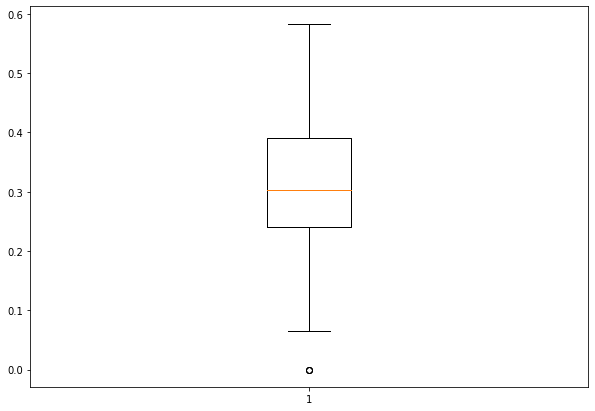

In [ ]:
cosine_sim_df['cosine_sim_values'] = pd.DataFrame(cosine_sim_values)
fig = plt.figure(figsize =(10, 7))
plt.boxplot(cosine_sim_df['cosine_sim_values'])

<h1> Rough Trials </h1>

In [ ]:
import gensim
from gensim.summarization import summarize

In [ ]:
type(testNew)
str(testNew)


'{2: "Lenny can\'t decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob\'s advice to pick the trousers that are of best quality.", 4: "Jane is in Warsaw. Ollie and Jane has a party. Jane lost her calendar. They will get a lunch this week on Friday. Ollie accidentally called Jane and talked about whisky. Jane cancels lunch. They\'ll meet for a tea at 6 pm.", 5: "Hilary has the keys to the apartment. Benjamin wants to get them and go take a nap. Hilary is having lunch with some French people at La Cantina. Hilary is meeting them at the entrance to the conference hall at 2 pm. Benjamin and Elliot might join them. They\'re meeting for the drinks in the evening.", 6: \'Payton provides Max with websites selling clothes. Payton likes browsing and trying on the clothes but not necessarily buying them. Payton usually buys clothes and books as he loves reading.\', 8: "Beatrice wants to buy Leo a scarf, but he doesn\'t like scarves. She cares about his health and wil

In [ ]:
testNew

{2: "Lenny can't decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob's advice to pick the trousers that are of best quality.",
 4: "Jane is in Warsaw. Ollie and Jane has a party. Jane lost her calendar. They will get a lunch this week on Friday. Ollie accidentally called Jane and talked about whisky. Jane cancels lunch. They'll meet for a tea at 6 pm.",
 5: "Hilary has the keys to the apartment. Benjamin wants to get them and go take a nap. Hilary is having lunch with some French people at La Cantina. Hilary is meeting them at the entrance to the conference hall at 2 pm. Benjamin and Elliot might join them. They're meeting for the drinks in the evening.",
 6: 'Payton provides Max with websites selling clothes. Payton likes browsing and trying on the clothes but not necessarily buying them. Payton usually buys clothes and books as he loves reading.',
 8: "Beatrice wants to buy Leo a scarf, but he doesn't like scarves. She cares about his health and will bu

In [ ]:
type(testNew)

dict

In [ ]:
stringtest = str(testNew)

In [ ]:
stringtest

'{2: "Lenny can\'t decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob\'s advice to pick the trousers that are of best quality.", 4: "Jane is in Warsaw. Ollie and Jane has a party. Jane lost her calendar. They will get a lunch this week on Friday. Ollie accidentally called Jane and talked about whisky. Jane cancels lunch. They\'ll meet for a tea at 6 pm.", 5: "Hilary has the keys to the apartment. Benjamin wants to get them and go take a nap. Hilary is having lunch with some French people at La Cantina. Hilary is meeting them at the entrance to the conference hall at 2 pm. Benjamin and Elliot might join them. They\'re meeting for the drinks in the evening.", 6: \'Payton provides Max with websites selling clothes. Payton likes browsing and trying on the clothes but not necessarily buying them. Payton usually buys clothes and books as he loves reading.\', 8: "Beatrice wants to buy Leo a scarf, but he doesn\'t like scarves. She cares about his health and wil

In [ ]:
type(stringtest)

str

In [ ]:
short_summary = summarize(stringtest)
print(short_summary)

Payton usually buys clothes and books as he loves reading.', 8: "Beatrice wants to buy Leo a scarf, but he doesn't like scarves.
Martin wants Aggie to go with him this week for the new film with Redford.', 14: 'Paul is going to share his Netflix account with Luke.
Paul is on vacation with his girlfriend till tomorrow.', 15: "Greg and Betsy have a lot of work today, so they cannot pick up Johnny from the kindergarten.
Greg will try to find a solution.", 20: "Beth wants to organize a girls weekend to celebrate her mother's 40th birthday.
Emma sent her a link to a website with some texts from previous years so that she can prepare for the exam better.', 24: "Next week is Wharton's birthday.
Ben will wake Emma up 15 minutes prior to their arrival.', 29: 'Jesse, Melvin, Lee and Maxine are going to take part in the Christmas charity action of the foundation called Refuge, which helps women and children who escape from abuse.', 34: 'Serge is on his way to pick up the film equipment for the sh

In [ ]:
from gensim.summarization.summarizer import summarize_corpus
from gensim.summarization import keywords

In [ ]:
import spacy
import en_core_web_sm

doc = stringtest
doc

'{2: "Lenny can\'t decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob\'s advice to pick the trousers that are of best quality.", 4: "Jane is in Warsaw. Ollie and Jane has a party. Jane lost her calendar. They will get a lunch this week on Friday. Ollie accidentally called Jane and talked about whisky. Jane cancels lunch. They\'ll meet for a tea at 6 pm.", 5: "Hilary has the keys to the apartment. Benjamin wants to get them and go take a nap. Hilary is having lunch with some French people at La Cantina. Hilary is meeting them at the entrance to the conference hall at 2 pm. Benjamin and Elliot might join them. They\'re meeting for the drinks in the evening.", 6: \'Payton provides Max with websites selling clothes. Payton likes browsing and trying on the clothes but not necessarily buying them. Payton usually buys clothes and books as he loves reading.\', 8: "Beatrice wants to buy Leo a scarf, but he doesn\'t like scarves. She cares about his health and wil

In [ ]:
f = open("context.txt", "w")
f.write(stringtest)
f.close()
#print(f)

In [ ]:
summary_content = summarize_corpus(stringtest, ratio= 0.05)
print(summary_content)


[['A'], ['z'], ['A'], ['Y'], ['9'], ['A'], ['A'], ['A'], ['A'], ['-'], ['z'], ['A'], ['z'], ['z'], ['z'], ['z'], ['A'], ['A'], ['Y'], ['9'], ['A'], ['A'], ['9'], ['-'], ['A'], ['9'], ['z'], ['9'], ['z'], ['z'], ['9'], ['z'], ['z'], ['9'], ['A'], ['z'], ['9'], ['9'], ['Y'], ['9'], ['A'], ['A'], ['9'], ['9'], ['9'], ['9'], ['A'], ['A'], ['-'], ['z'], ['9'], ['9'], ['A'], ['z'], ['A'], ['z'], ['A'], ['-'], ['A'], ['z'], ['9'], ['A'], ['A'], ['A'], ['-'], ['z'], ['9'], ['9'], ['9'], ['9'], ['9'], ['-'], ['-'], ['A'], ['9'], ['A'], ['A'], ['z'], ['9'], ['z'], ['z'], ['A'], ['A'], ['A'], ['A'], ['9'], ['A'], ['z'], ['9'], ['Y'], ['z'], ['A'], ['9'], ['-'], ['A'], ['9'], ['9'], ['z'], ['9'], ['9'], ['9'], ['9'], ['-'], ['A'], ['A'], ['A'], ['A'], ['A'], ['9'], ['A'], ['A'], ['A'], ['9'], ['-'], ['A'], ['9'], ['-'], ['A'], ['9'], ['A'], ['A'], ['A'], ['A'], ['A'], ['-'], ['-'], ['9'], ['Y'], ['Y'], ['Y'], ['A'], ['9'], ['A'], ['A'], ['A'], ['A'], ['A'], ['9'], ['9'], ['A'], ['9'], ['A'], ['9']

In [ ]:

# Summary [0.5% of the original content]
summary_ = summarize(stringtest, ratio= 0.05)
print(summary_)

Martin wants Aggie to go with him this week for the new film with Redford.', 14: 'Paul is going to share his Netflix account with Luke.
Paul is on vacation with his girlfriend till tomorrow.', 15: "Greg and Betsy have a lot of work today, so they cannot pick up Johnny from the kindergarten.
Emma sent her a link to a website with some texts from previous years so that she can prepare for the exam better.', 24: "Next week is Wharton's birthday.
Ben will wake Emma up 15 minutes prior to their arrival.', 29: 'Jesse, Melvin, Lee and Maxine are going to take part in the Christmas charity action of the foundation called Refuge, which helps women and children who escape from abuse.', 34: 'Serge is on his way to pick up the film equipment for the shooting tonight.
Ola will try to find a blouse for mum in Cuba, as Kate suggested.", 46: 'Adele got a new biscuit Labrador Chewy that is 4 months.
Her cats keep their distance, and Poppy and Lulu seem to mother Chewy and Speedy wants to play.', 50: 'N

In [ ]:

# Summary [200 words]
summary_words = summarize(stringtest, word_count= 200)
print(summary_words)

Martin wants Aggie to go with him this week for the new film with Redford.', 14: 'Paul is going to share his Netflix account with Luke.
Her cats keep their distance, and Poppy and Lulu seem to mother Chewy and Speedy wants to play.', 50: 'Nick finds Jane pretty and invites her for a drink to get to know her better.
They all want a Korean evening on Wednesday in two weeks time.", 67: "Jane wants to leave at 4.30 instead of 5 because Google Maps suggests the 300 km drive should take them at least 3 hours and she doesn't want to be late.
Josh will call Brian after work to talk about it.", 86: "Nathalie, Olafur and Zoe are planning the New Year's Eve. Nathalie wants something classy.
His product number is 898998 and he will place the order on the company's website.", 206: 'After work, Mike is going to go to the gym and then home.
Daisy will come by Linda's place to meet her and help her pack as she is too busy to go out.", 208: "Hayden must write her thesis in 1 month.
Truman and Rodney th